In [1]:
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np, math
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac')
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/CLASEG2DataMining/EG2DataMiningPackage/mac')
import GeneralPlot as gp , Initiation as init, plot_tools as pt
import matplotlib.patches as patches
from scipy.interpolate import interp1d, Akima1DInterpolator,BarycentricInterpolator,splprep
from plot_tools import *
from my_tools import *
%matplotlib inline

In [2]:
virtuality = pd.read_csv('virtuality_data.csv')

In [3]:
virtuality

,nu,PW,DWIA,M7
0,-0.149375,0.859073,0.359294,0.335321
1,-0.148125,0.858327,0.366673,0.341788
2,-0.146875,0.859093,0.372633,0.347341
3,-0.145625,0.858686,0.381260,0.354443
4,-0.144375,0.857731,0.384550,0.358474
5,-0.143125,0.858822,0.387290,0.361905
6,-0.141875,0.858796,0.393406,0.368242
7,-0.140625,0.858048,0.402187,0.375130
8,-0.139375,0.857360,0.405646,0.379569
9,-0.138125,0.858533,0.412811,0.386073


In [4]:
virtuality = virtuality[(virtuality<-0.03)|(virtuality>0.015)]
virtuality['M7_2_PW'] = virtuality.M7 / virtuality.PW

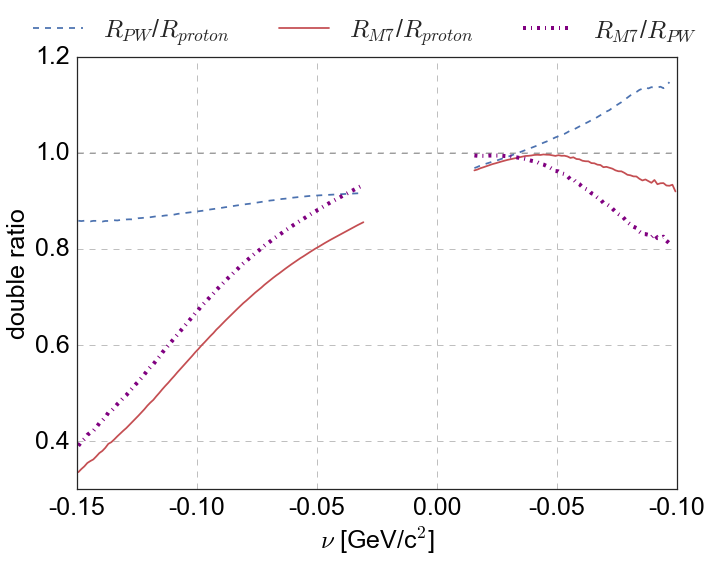

In [44]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(virtuality.nu,virtuality.PW,'b--',label='$R_{PW}$/$R_{proton}$')
plt.plot(virtuality.nu,virtuality.M7,'r-',label='$R_{M7}$/$R_{proton}$')
plt.plot(virtuality.nu,virtuality.M7_2_PW,'-.',linewidth=4,color='purple',label='$R_{M7}$/$R_{PW}$')

x = np.linspace(np.min(virtuality.nu),np.max(virtuality.nu),100)
plt.plot( x , np.ones(len(x)) , '--' ,color='black' , alpha=0.2)
set_axes(ax,x_label='$\\nu$ [GeV/c$^2$]',y_label='double ratio',fontsize=25)
# ax.legend(loc='best',fontsize=25)
ax.grid(True,linestyle='--',color='0.75')

plt.legend(bbox_to_anchor=(1.05, 1), loc=4, ncol=3, borderaxespad=0. , fontsize=25)#loc='best',fontsize=25)
xx, locs = plt.xticks()
ll = ['-%.2f' % math.fabs(a) if np.abs(a)>0.001 else '%.2f'%a for a in xx]
plt.xticks(xx, ll)
ax.set_xlim(-0.15,0.1)
plt.tick_params(axis='both', which='major', labelsize=25)
ax.set_aspect(0.2)
plt.tight_layout()
plt.savefig('/Users/erezcohen/Desktop/ratio_M7_to_PW.pdf')